---
title: "Régression linéaire code Python"
author: "Jason Suárez"
date: "2024-02-02"
categories: ["Data Science", "Python"]
image: "image.png"
draft: true
---

Dans ce notebook, nous allons voir comment implémenter une régression linéaire en Python. Nous n'allons pas utiliser de bibliothèques pour ce faire, mais nous allons plutôt implémenter l'algorithme de régression linéaire à partir de zéro. Nous allons également voir comment utiliser notre implémentation pour prédire des valeurs à partir d'un ensemble de données.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
# from comp_rl import *
from utils import *

/var/folders/yj/l9r_dtt126ncwq1x9jfz7xkw0000gn/T/ipykernel_41855/2717165141.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Chargement et visualisation des données

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

# On élimine les rangées avec des valeurs manquantes
train_data = train_data.dropna()
test_data = test_data.dropna()

train_data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [3]:
# On sépare les données en X et y

X_train = train_data.x
y_train = train_data.y

X_test = test_data.x
y_test = test_data.y

In [4]:
train_data.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


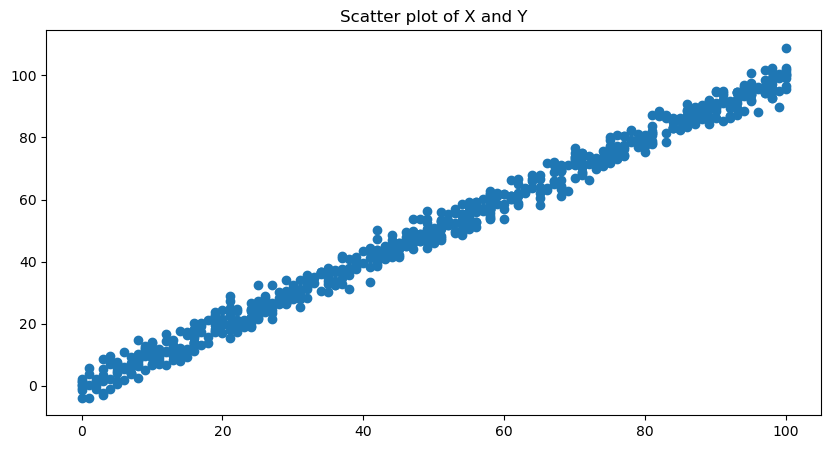

In [5]:
plt.figure(figsize=(10, 5))
plt.title("Scatter plot of X and Y")
plt.scatter(train_data.x, train_data.y)
plt.show()

### Préparation des jeux de données

In [6]:
from utils import dataset_splitter

X_train, X_val, y_train, y_val = dataset_splitter(X_train, y_train, test_size=0.3)

train_size: 70.0% - test_size: 30.0%
X_train: 70%
X_val: 30%


### Standardisation des données



Standardization is a preprocessing technique used in machine learning to rescale and transform the features (variables) of a dataset to have a mean of 0 and a standard deviation of 1. It is also known as "z-score normalization" or "z-score scaling." Standardization is an essential step in the data preprocessing pipeline for various reasons:

### Why Use Standardization in Machine Learning?

1. **Mean Centering**: Standardization centers the data by subtracting the mean from each feature. This ensures that the transformed data has a mean of 0. Mean centering is crucial because it helps in capturing the relative variations in the data.

2. **Scale Invariance**: Standardization scales the data by dividing each feature by its standard deviation. This makes the data scale-invariant, meaning that the scale of the features no longer affects the performance of many machine learning algorithms. Without standardization, features with larger scales may dominate the learning process.

3. **Improved Convergence**: Many machine learning algorithms, such as gradient-based optimization algorithms (e.g., gradient descent), converge faster when the features are standardized. It reduces the potential for numerical instability and overflow/underflow issues during training.

4. **Comparability**: Standardizing the features makes it easier to compare and interpret the importance of each feature. This is especially important in models like linear regression, where the coefficients represent the feature's impact on the target variable.

5. **Regularization**: In regularization techniques like Ridge and Lasso regression, the regularization strength is applied uniformly to all features. Standardization ensures that the regularization term applies fairly to all features.

### How to Standardize Data

The standardization process involves the following steps:

1. Calculate the mean ($\mu$) and standard deviation ($\sigma$) for each feature in the dataset.
2. For each data point (sample), subtract the mean ($\mu$) of the feature and then divide by the standard deviation ($\sigma$) of the feature.

Mathematically, the standardized value for a feature `x` in a dataset is calculated as:

$$
\text{Standardized value} = \frac{x - \mu}{\sigma}
$$

Here, `x` is the original value of the feature, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.

In [7]:
X_train, y_train = standardize_data(X_train, y_train)
X_val, y_val = standardize_data(X_val, y_val)

# On remodèle les données pour qu'elles soient compatibles avec le modèle
X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)


## Implémentation de l'algorithme de régression linéaire



Linear regression is a fundamental model in machine learning used for predicting a continuous output variable based on input features. The model function for linear regression is represented as:

$$f_{w,b}(x) = wx + b$$

In this equation, $f_{w,b}(x)$ represents the predicted output, $w$ is the weight parameter, $b$ is the bias parameter, and $x$ is the input feature.

## Model Training

To train a linear regression model, we aim to find the best values for the parameters $(w, b)$ that best fit our dataset.

### Forward Pass

The forward pass is a step where we compute the linear regression output for the input data $X$ using the current weights and biases. It's essentially applying our model to the input data.

### Cost Function

The cost function is used to measure how well our model is performing. It quantifies the difference between the predicted values and the actual values in our dataset. The cost function is defined as:

$$J(w,b) = \frac{1}{2m} \sum_{i=1}^{m}(f_{w,b}(x^{(i)}) - y^{(i)})^2$$

Here, $J(w, b)$ is the cost, $m$ is the number of training examples, $x^{(i)}$ is the input data for the $i$-th example, $y^{(i)}$ is the actual output for the $i$-th example, and $w$ and $b$ are the weight and bias parameters, respectively.
****
### Backward Pass (Gradient Computation)

The backward pass computes the gradients of the cost function with respect to the weights and biases. These gradients are crucial for updating the model parameters during training. The gradient formulas are as follows:
$$
\frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(X^{(i)}) - y^{(i)})
$$

$$
\frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(X^{(i)}) - y^{(i)})X^{(i)}
$$

## Training Process

The training process involves iteratively updating the weights and biases to minimize the cost function. This is typically done through an optimization algorithm like gradient descent. The update equations for parameters are:

$$w \leftarrow w - \alpha \frac{\partial J}{\partial w}$$

$$b \leftarrow b - \alpha \frac{\partial J}{\partial b}$$

Here, $\alpha$ represents the learning rate, which controls the step size during parameter updates.

By iteratively performing the forward pass, computing the cost, performing the backward pass, and updating the parameters, the model learns to make better predictions and fit the data.


In [8]:
X_train[:4]


array([[-0.71105588],
       [ 0.29327514],
       [ 1.19370984],
       [ 0.91665301]])

Cost after iteration 0: 0.4851672196703972
Cost after iteration 100: 0.06901177899776276
Cost after iteration 200: 0.013255408366071298
Cost after iteration 300: 0.005785187957577213
Cost after iteration 400: 0.004784330256129879
Converged after 457 iterations.


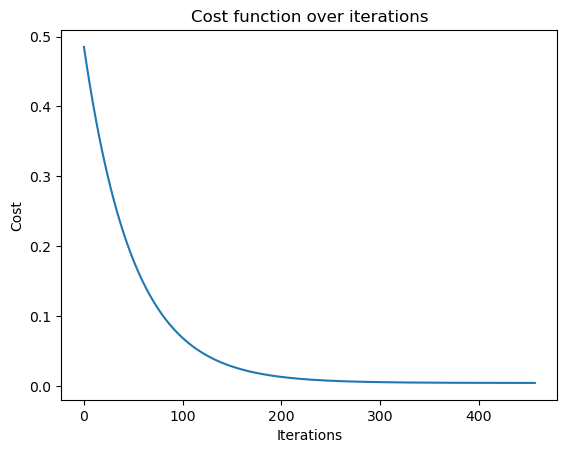

In [9]:

rl = LinearRegression(
    learning_rate=0.01,
)
costs = rl.fit(X_train, y_train, iterations=10000)



In [10]:
#y_pred = rl.predict(X_val)
# rl.plot_cost(costs)